In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter, defaultdict, OrderedDict
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_users_path = '../../Data/train_users_2.csv'

In [3]:
train_users = pd.read_csv(train_users_path)
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [21]:
devType = Counter(train_users.first_device_type).most_common()
devType

[('Mac Desktop', 89600),
 ('Windows Desktop', 72716),
 ('iPhone', 20759),
 ('iPad', 14339),
 ('Other/Unknown', 10667),
 ('Android Phone', 2803),
 ('Android Tablet', 1292),
 ('Desktop (Other)', 1199),
 ('SmartPhone (Other)', 76)]

## Percent of users device users by chosen country of first visit

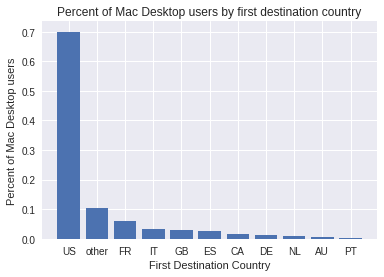

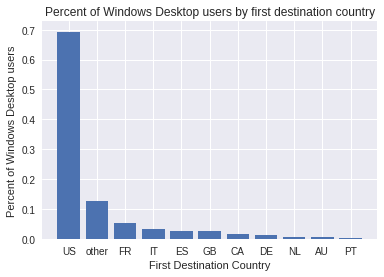

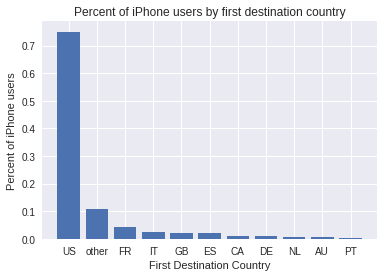

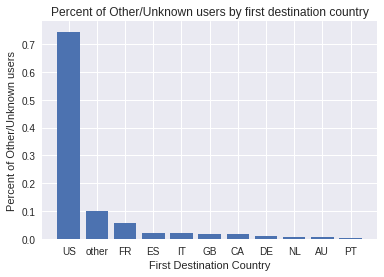

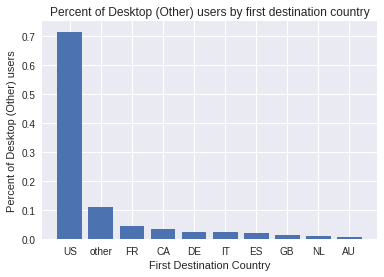

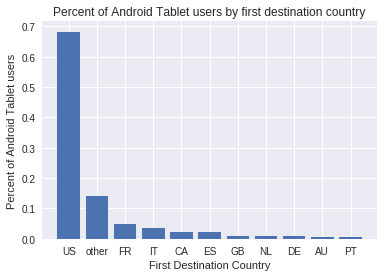

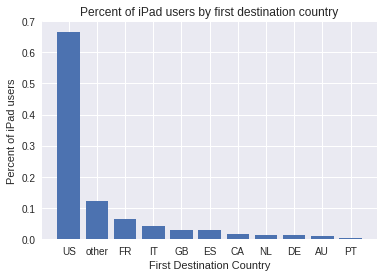

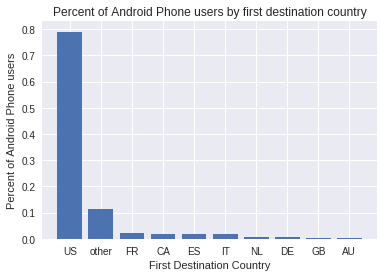

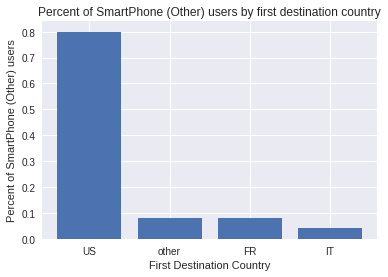

In [78]:
countryByDT = defaultdict(list)
countryByDTCount = defaultdict(list)
totByDT = defaultdict(list)
perByDT = defaultdict(list)
for dev in train_users['first_device_type'].unique():
    countryByDT[dev] = train_users.country_destination[[j*r for j,r in zip(train_users.first_device_type == dev,train_users.country_destination != 'NDF')]]
    countryByDTCount[dev] = Counter(countryByDT[dev]).most_common()
    totByDT[dev] = sum([j[1]  for j in countryByDTCount[dev]])
    for i in range(len(countryByDTCount[dev])):
        perByDT[dev].append((countryByDTCount[dev][i][0],countryByDTCount[dev][i][1]/totByDT[dev]))
    countries = [i[0] for i in perByDT[dev]]
    percent = [i[1] for i in perByDT[dev]] 
  
    plt.bar(range(len(percent)),percent)
    plt.xticks(range(len(countries)), countries) 
    plt.title('Percent of ' + dev + ' users by first destination country')
    plt.xlabel('First Destination Country')
    plt.ylabel('Percent of ' + dev + ' users')
    plt.show()
    
    
  

## Percent of device users by chosen country of first visit (w/o US)

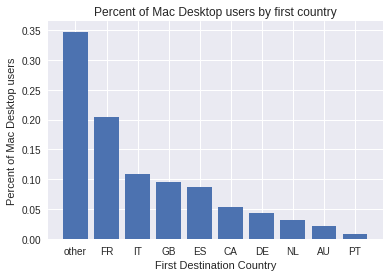

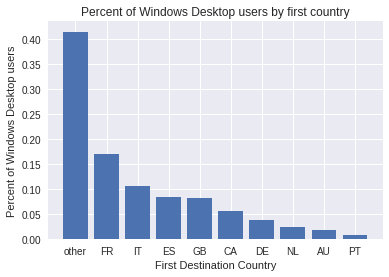

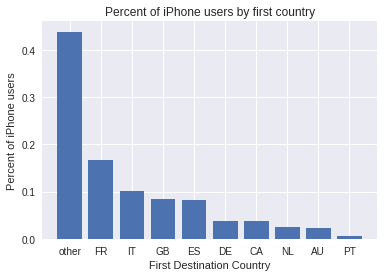

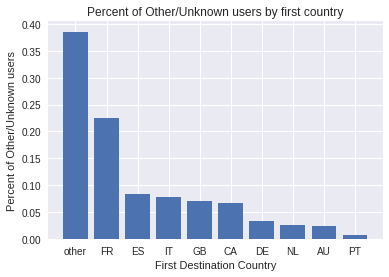

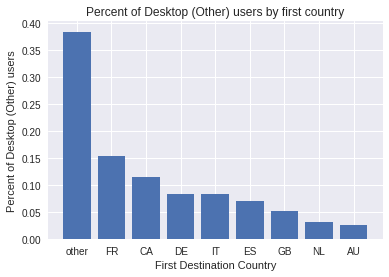

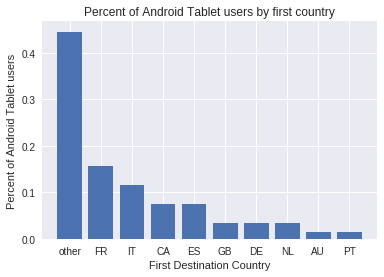

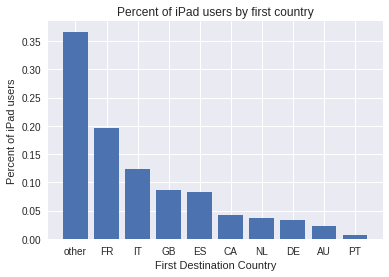

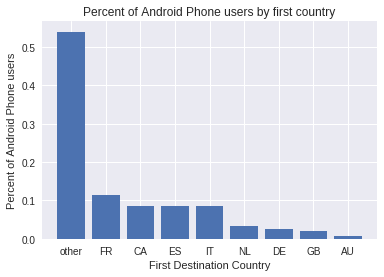

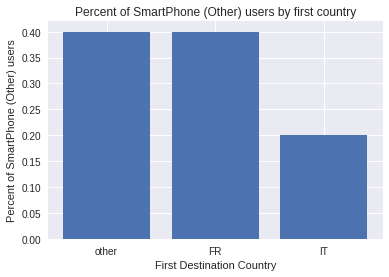

In [76]:
countryByDT = defaultdict(list)
countryByDTCount = defaultdict(list)
totByDT = defaultdict(list)
perByDT = defaultdict(list)
for dev in train_users['first_device_type'].unique():
    countryByDT[dev] = train_users.country_destination[[j*r*z for j,r,z in zip(train_users.first_device_type == dev,train_users.country_destination != 'NDF',train_users.country_destination != 'US')]]
    countryByDTCount[dev] = Counter(countryByDT[dev]).most_common()
    totByDT[dev] = sum([j[1]  for j in countryByDTCount[dev]])
    for i in range(len(countryByDTCount[dev])):
        perByDT[dev].append((countryByDTCount[dev][i][0],countryByDTCount[dev][i][1]/totByDT[dev]))
    countries = [i[0] for i in perByDT[dev]]
    percent = [i[1] for i in perByDT[dev]] 
  
    plt.bar(range(len(percent)),percent)
    plt.xticks(range(len(countries)), countries) 
    plt.title('Percent of ' + dev + ' users by first country')
    plt.xlabel('First Destination Country')
    plt.ylabel('Percent of ' + dev + ' users')
    plt.show()
    
    